##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-09-28 06:39:10.819623: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-28 06:39:10.819665: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-28 06:39:10.819704: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.14.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

29515/29515 [==============================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

 4202496/26421880 [===>..........................] - ETA: 0s

18219008/26421880 [===================>..........] - ETA: 0s

26421880/26421880 [==============================] - 0s 0us/step


5148/5148 [==============================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

4422102/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

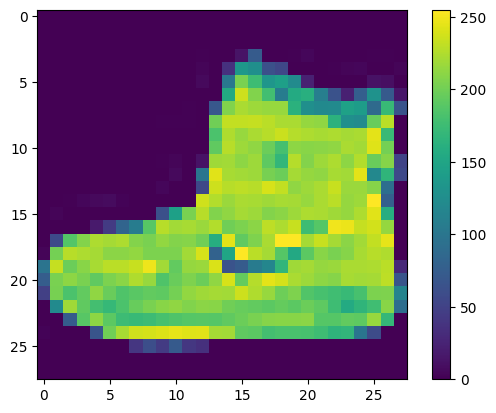

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

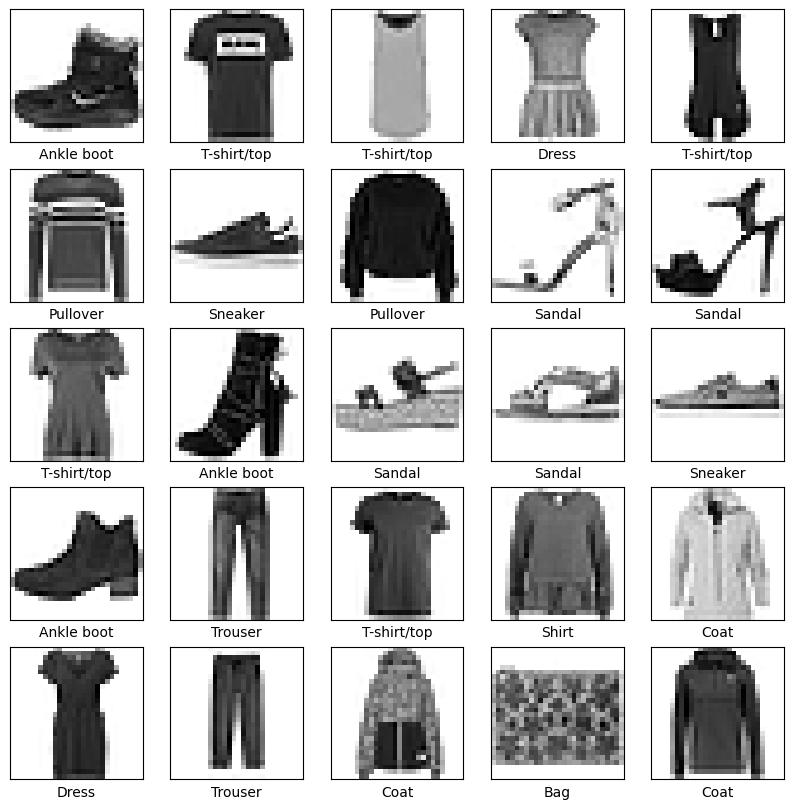

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2023-09-28 06:39:15.849641: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 13:27 - loss: 2.3998 - accuracy: 0.0625

  19/1875 [..............................] - ETA: 5s - loss: 1.6056 - accuracy: 0.4819   

  39/1875 [..............................] - ETA: 4s - loss: 1.2753 - accuracy: 0.5689

  60/1875 [..............................] - ETA: 4s - loss: 1.0914 - accuracy: 0.6313

  82/1875 [>.............................] - ETA: 4s - loss: 0.9994 - accuracy: 0.6639

 103/1875 [>.............................] - ETA: 4s - loss: 0.9383 - accuracy: 0.6829

 125/1875 [=>............................] - ETA: 4s - loss: 0.8882 - accuracy: 0.6960

 147/1875 [=>............................] - ETA: 4s - loss: 0.8580 - accuracy: 0.7073

 170/1875 [=>............................] - ETA: 4s - loss: 0.8401 - accuracy: 0.7112

 193/1875 [==>...........................] - ETA: 4s - loss: 0.8097 - accuracy: 0.7222

 216/1875 [==>...........................] - ETA: 3s - loss: 0.7871 - accuracy: 0.7299

 238/1875 [==>...........................] - ETA: 3s - loss: 0.7679 - accuracy: 0.7375

 259/1875 [===>..........................] - ETA: 3s - loss: 0.7489 - accuracy: 0.7430

 281/1875 [===>..........................] - ETA: 3s - loss: 0.7337 - accuracy: 0.7481

 303/1875 [===>..........................] - ETA: 3s - loss: 0.7219 - accuracy: 0.7518

 325/1875 [====>.........................] - ETA: 3s - loss: 0.7098 - accuracy: 0.7565

 348/1875 [====>.........................] - ETA: 3s - loss: 0.7018 - accuracy: 0.7584

 372/1875 [====>.........................] - ETA: 3s - loss: 0.6939 - accuracy: 0.7623

 395/1875 [=====>........................] - ETA: 3s - loss: 0.6825 - accuracy: 0.7665

 418/1875 [=====>........................] - ETA: 3s - loss: 0.6744 - accuracy: 0.7691

 441/1875 [======>.......................] - ETA: 3s - loss: 0.6669 - accuracy: 0.7707

 464/1875 [======>.......................] - ETA: 3s - loss: 0.6591 - accuracy: 0.7736

 487/1875 [======>.......................] - ETA: 3s - loss: 0.6523 - accuracy: 0.7759

 510/1875 [=======>......................] - ETA: 3s - loss: 0.6456 - accuracy: 0.7789

 533/1875 [=======>......................] - ETA: 3s - loss: 0.6420 - accuracy: 0.7798

 555/1875 [=======>......................] - ETA: 3s - loss: 0.6364 - accuracy: 0.7815

 578/1875 [========>.....................] - ETA: 2s - loss: 0.6317 - accuracy: 0.7829

 601/1875 [========>.....................] - ETA: 2s - loss: 0.6243 - accuracy: 0.7850

 624/1875 [========>.....................] - ETA: 2s - loss: 0.6181 - accuracy: 0.7868

 646/1875 [=========>....................] - ETA: 2s - loss: 0.6152 - accuracy: 0.7881

 669/1875 [=========>....................] - ETA: 2s - loss: 0.6117 - accuracy: 0.7886

 692/1875 [==========>...................] - ETA: 2s - loss: 0.6077 - accuracy: 0.7903

 715/1875 [==========>...................] - ETA: 2s - loss: 0.6042 - accuracy: 0.7914

 738/1875 [==========>...................] - ETA: 2s - loss: 0.5996 - accuracy: 0.7934

 761/1875 [===========>..................] - ETA: 2s - loss: 0.5935 - accuracy: 0.7956

 784/1875 [===========>..................] - ETA: 2s - loss: 0.5899 - accuracy: 0.7969

 807/1875 [===========>..................] - ETA: 2s - loss: 0.5845 - accuracy: 0.7985

 830/1875 [============>.................] - ETA: 2s - loss: 0.5823 - accuracy: 0.7988

 853/1875 [============>.................] - ETA: 2s - loss: 0.5802 - accuracy: 0.7991

 876/1875 [=============>................] - ETA: 2s - loss: 0.5771 - accuracy: 0.8002

 899/1875 [=============>................] - ETA: 2s - loss: 0.5730 - accuracy: 0.8013

 922/1875 [=============>................] - ETA: 2s - loss: 0.5709 - accuracy: 0.8021

 946/1875 [==============>...............] - ETA: 2s - loss: 0.5676 - accuracy: 0.8031

 969/1875 [==============>...............] - ETA: 2s - loss: 0.5650 - accuracy: 0.8036

 992/1875 [==============>...............] - ETA: 2s - loss: 0.5623 - accuracy: 0.8044

1014/1875 [===============>..............] - ETA: 1s - loss: 0.5599 - accuracy: 0.8053

1037/1875 [===============>..............] - ETA: 1s - loss: 0.5574 - accuracy: 0.8063

1060/1875 [===============>..............] - ETA: 1s - loss: 0.5561 - accuracy: 0.8068

1083/1875 [================>.............] - ETA: 1s - loss: 0.5538 - accuracy: 0.8073

1106/1875 [================>.............] - ETA: 1s - loss: 0.5519 - accuracy: 0.8080

1129/1875 [=================>............] - ETA: 1s - loss: 0.5499 - accuracy: 0.8085

1151/1875 [=================>............] - ETA: 1s - loss: 0.5466 - accuracy: 0.8097

1174/1875 [=================>............] - ETA: 1s - loss: 0.5446 - accuracy: 0.8103

1197/1875 [==================>...........] - ETA: 1s - loss: 0.5433 - accuracy: 0.8108

1219/1875 [==================>...........] - ETA: 1s - loss: 0.5419 - accuracy: 0.8112

1241/1875 [==================>...........] - ETA: 1s - loss: 0.5395 - accuracy: 0.8117

1263/1875 [===================>..........] - ETA: 1s - loss: 0.5380 - accuracy: 0.8119

1286/1875 [===================>..........] - ETA: 1s - loss: 0.5370 - accuracy: 0.8123

1309/1875 [===================>..........] - ETA: 1s - loss: 0.5344 - accuracy: 0.8134

1332/1875 [====================>.........] - ETA: 1s - loss: 0.5327 - accuracy: 0.8142

1355/1875 [====================>.........] - ETA: 1s - loss: 0.5298 - accuracy: 0.8151

1377/1875 [=====================>........] - ETA: 1s - loss: 0.5287 - accuracy: 0.8155

1399/1875 [=====================>........] - ETA: 1s - loss: 0.5280 - accuracy: 0.8157

1422/1875 [=====================>........] - ETA: 1s - loss: 0.5270 - accuracy: 0.8161

1444/1875 [======================>.......] - ETA: 0s - loss: 0.5249 - accuracy: 0.8166

1467/1875 [======================>.......] - ETA: 0s - loss: 0.5240 - accuracy: 0.8171

1490/1875 [======================>.......] - ETA: 0s - loss: 0.5225 - accuracy: 0.8176

1512/1875 [=======================>......] - ETA: 0s - loss: 0.5217 - accuracy: 0.8179

1534/1875 [=======================>......] - ETA: 0s - loss: 0.5199 - accuracy: 0.8183

1556/1875 [=======================>......] - ETA: 0s - loss: 0.5189 - accuracy: 0.8187

1579/1875 [========================>.....] - ETA: 0s - loss: 0.5176 - accuracy: 0.8191

1601/1875 [========================>.....] - ETA: 0s - loss: 0.5171 - accuracy: 0.8193

1624/1875 [========================>.....] - ETA: 0s - loss: 0.5158 - accuracy: 0.8197

1647/1875 [=========================>....] - ETA: 0s - loss: 0.5144 - accuracy: 0.8201

1669/1875 [=========================>....] - ETA: 0s - loss: 0.5133 - accuracy: 0.8206

1691/1875 [==========================>...] - ETA: 0s - loss: 0.5120 - accuracy: 0.8210

1713/1875 [==========================>...] - ETA: 0s - loss: 0.5113 - accuracy: 0.8213

1735/1875 [==========================>...] - ETA: 0s - loss: 0.5093 - accuracy: 0.8220

1757/1875 [===========================>..] - ETA: 0s - loss: 0.5076 - accuracy: 0.8226

1780/1875 [===========================>..] - ETA: 0s - loss: 0.5062 - accuracy: 0.8231

1803/1875 [===========================>..] - ETA: 0s - loss: 0.5049 - accuracy: 0.8235

1826/1875 [============================>.] - ETA: 0s - loss: 0.5037 - accuracy: 0.8239

1848/1875 [============================>.] - ETA: 0s - loss: 0.5028 - accuracy: 0.8242

1871/1875 [============================>.] - ETA: 0s - loss: 0.5021 - accuracy: 0.8244

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5019 - accuracy: 0.8245


Epoch 2/10


   1/1875 [..............................] - ETA: 5s - loss: 0.4096 - accuracy: 0.8438

  23/1875 [..............................] - ETA: 4s - loss: 0.3930 - accuracy: 0.8614

  46/1875 [..............................] - ETA: 4s - loss: 0.3817 - accuracy: 0.8682

  69/1875 [>.............................] - ETA: 4s - loss: 0.3854 - accuracy: 0.8678

  91/1875 [>.............................] - ETA: 4s - loss: 0.3769 - accuracy: 0.8681

 114/1875 [>.............................] - ETA: 4s - loss: 0.3673 - accuracy: 0.8734

 136/1875 [=>............................] - ETA: 3s - loss: 0.3718 - accuracy: 0.8711

 158/1875 [=>............................] - ETA: 3s - loss: 0.3721 - accuracy: 0.8703

 180/1875 [=>............................] - ETA: 3s - loss: 0.3760 - accuracy: 0.8682

 202/1875 [==>...........................] - ETA: 3s - loss: 0.3788 - accuracy: 0.8676

 224/1875 [==>...........................] - ETA: 3s - loss: 0.3793 - accuracy: 0.8672

 246/1875 [==>...........................] - ETA: 3s - loss: 0.3800 - accuracy: 0.8655

 269/1875 [===>..........................] - ETA: 3s - loss: 0.3835 - accuracy: 0.8633

 291/1875 [===>..........................] - ETA: 3s - loss: 0.3871 - accuracy: 0.8619

 313/1875 [====>.........................] - ETA: 3s - loss: 0.3861 - accuracy: 0.8622

 335/1875 [====>.........................] - ETA: 3s - loss: 0.3861 - accuracy: 0.8618

 358/1875 [====>.........................] - ETA: 3s - loss: 0.3871 - accuracy: 0.8614

 381/1875 [=====>........................] - ETA: 3s - loss: 0.3853 - accuracy: 0.8619

 404/1875 [=====>........................] - ETA: 3s - loss: 0.3851 - accuracy: 0.8616

 427/1875 [=====>........................] - ETA: 3s - loss: 0.3882 - accuracy: 0.8613

 449/1875 [======>.......................] - ETA: 3s - loss: 0.3874 - accuracy: 0.8612

 471/1875 [======>.......................] - ETA: 3s - loss: 0.3884 - accuracy: 0.8610

 493/1875 [======>.......................] - ETA: 3s - loss: 0.3895 - accuracy: 0.8604

 516/1875 [=======>......................] - ETA: 3s - loss: 0.3905 - accuracy: 0.8594

 539/1875 [=======>......................] - ETA: 3s - loss: 0.3923 - accuracy: 0.8590

 561/1875 [=======>......................] - ETA: 2s - loss: 0.3911 - accuracy: 0.8595

 583/1875 [========>.....................] - ETA: 2s - loss: 0.3906 - accuracy: 0.8594

 605/1875 [========>.....................] - ETA: 2s - loss: 0.3900 - accuracy: 0.8595

 626/1875 [=========>....................] - ETA: 2s - loss: 0.3883 - accuracy: 0.8600

 648/1875 [=========>....................] - ETA: 2s - loss: 0.3870 - accuracy: 0.8605

 670/1875 [=========>....................] - ETA: 2s - loss: 0.3883 - accuracy: 0.8597

 692/1875 [==========>...................] - ETA: 2s - loss: 0.3893 - accuracy: 0.8593

 715/1875 [==========>...................] - ETA: 2s - loss: 0.3903 - accuracy: 0.8590

 737/1875 [==========>...................] - ETA: 2s - loss: 0.3888 - accuracy: 0.8597

 761/1875 [===========>..................] - ETA: 2s - loss: 0.3861 - accuracy: 0.8606

 785/1875 [===========>..................] - ETA: 2s - loss: 0.3850 - accuracy: 0.8610

 810/1875 [===========>..................] - ETA: 2s - loss: 0.3857 - accuracy: 0.8607

 834/1875 [============>.................] - ETA: 2s - loss: 0.3846 - accuracy: 0.8609

 858/1875 [============>.................] - ETA: 2s - loss: 0.3834 - accuracy: 0.8614

 882/1875 [=============>................] - ETA: 2s - loss: 0.3844 - accuracy: 0.8616

 906/1875 [=============>................] - ETA: 2s - loss: 0.3851 - accuracy: 0.8613

 931/1875 [=============>................] - ETA: 2s - loss: 0.3834 - accuracy: 0.8620

 955/1875 [==============>...............] - ETA: 2s - loss: 0.3846 - accuracy: 0.8619

 980/1875 [==============>...............] - ETA: 2s - loss: 0.3843 - accuracy: 0.8617

1005/1875 [===============>..............] - ETA: 1s - loss: 0.3835 - accuracy: 0.8620

1029/1875 [===============>..............] - ETA: 1s - loss: 0.3831 - accuracy: 0.8624

1053/1875 [===============>..............] - ETA: 1s - loss: 0.3827 - accuracy: 0.8625

1077/1875 [================>.............] - ETA: 1s - loss: 0.3821 - accuracy: 0.8630

1101/1875 [================>.............] - ETA: 1s - loss: 0.3819 - accuracy: 0.8632

1126/1875 [=================>............] - ETA: 1s - loss: 0.3824 - accuracy: 0.8630

1150/1875 [=================>............] - ETA: 1s - loss: 0.3823 - accuracy: 0.8631

1174/1875 [=================>............] - ETA: 1s - loss: 0.3822 - accuracy: 0.8633

1198/1875 [==================>...........] - ETA: 1s - loss: 0.3812 - accuracy: 0.8638

1222/1875 [==================>...........] - ETA: 1s - loss: 0.3810 - accuracy: 0.8642

1245/1875 [==================>...........] - ETA: 1s - loss: 0.3812 - accuracy: 0.8640

1268/1875 [===================>..........] - ETA: 1s - loss: 0.3815 - accuracy: 0.8639

1293/1875 [===================>..........] - ETA: 1s - loss: 0.3815 - accuracy: 0.8640

1317/1875 [====================>.........] - ETA: 1s - loss: 0.3809 - accuracy: 0.8642

1340/1875 [====================>.........] - ETA: 1s - loss: 0.3803 - accuracy: 0.8644

1364/1875 [====================>.........] - ETA: 1s - loss: 0.3796 - accuracy: 0.8645

1387/1875 [=====================>........] - ETA: 1s - loss: 0.3792 - accuracy: 0.8647

1411/1875 [=====================>........] - ETA: 1s - loss: 0.3785 - accuracy: 0.8652

1435/1875 [=====================>........] - ETA: 0s - loss: 0.3780 - accuracy: 0.8652

1459/1875 [======================>.......] - ETA: 0s - loss: 0.3781 - accuracy: 0.8652

1483/1875 [======================>.......] - ETA: 0s - loss: 0.3778 - accuracy: 0.8652

1507/1875 [=======================>......] - ETA: 0s - loss: 0.3775 - accuracy: 0.8650

1531/1875 [=======================>......] - ETA: 0s - loss: 0.3765 - accuracy: 0.8654

1555/1875 [=======================>......] - ETA: 0s - loss: 0.3759 - accuracy: 0.8657

1579/1875 [========================>.....] - ETA: 0s - loss: 0.3757 - accuracy: 0.8657

1602/1875 [========================>.....] - ETA: 0s - loss: 0.3766 - accuracy: 0.8654

1626/1875 [=========================>....] - ETA: 0s - loss: 0.3758 - accuracy: 0.8657

1650/1875 [=========================>....] - ETA: 0s - loss: 0.3756 - accuracy: 0.8658

1674/1875 [=========================>....] - ETA: 0s - loss: 0.3752 - accuracy: 0.8659

1698/1875 [==========================>...] - ETA: 0s - loss: 0.3748 - accuracy: 0.8661

1723/1875 [==========================>...] - ETA: 0s - loss: 0.3746 - accuracy: 0.8659

1747/1875 [==========================>...] - ETA: 0s - loss: 0.3752 - accuracy: 0.8657

1771/1875 [===========================>..] - ETA: 0s - loss: 0.3753 - accuracy: 0.8657

1795/1875 [===========================>..] - ETA: 0s - loss: 0.3758 - accuracy: 0.8655

1819/1875 [============================>.] - ETA: 0s - loss: 0.3753 - accuracy: 0.8655

1843/1875 [============================>.] - ETA: 0s - loss: 0.3759 - accuracy: 0.8651

1866/1875 [============================>.] - ETA: 0s - loss: 0.3758 - accuracy: 0.8651

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8652


Epoch 3/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2588 - accuracy: 0.9062

  25/1875 [..............................] - ETA: 3s - loss: 0.3490 - accuracy: 0.8763

  49/1875 [..............................] - ETA: 3s - loss: 0.3465 - accuracy: 0.8763

  73/1875 [>.............................] - ETA: 3s - loss: 0.3383 - accuracy: 0.8784

  97/1875 [>.............................] - ETA: 3s - loss: 0.3387 - accuracy: 0.8785

 121/1875 [>.............................] - ETA: 3s - loss: 0.3346 - accuracy: 0.8804

 145/1875 [=>............................] - ETA: 3s - loss: 0.3405 - accuracy: 0.8772

 169/1875 [=>............................] - ETA: 3s - loss: 0.3425 - accuracy: 0.8756

 193/1875 [==>...........................] - ETA: 3s - loss: 0.3422 - accuracy: 0.8748

 217/1875 [==>...........................] - ETA: 3s - loss: 0.3372 - accuracy: 0.8763

 241/1875 [==>...........................] - ETA: 3s - loss: 0.3387 - accuracy: 0.8766

 266/1875 [===>..........................] - ETA: 3s - loss: 0.3364 - accuracy: 0.8768

 291/1875 [===>..........................] - ETA: 3s - loss: 0.3375 - accuracy: 0.8767

 316/1875 [====>.........................] - ETA: 3s - loss: 0.3364 - accuracy: 0.8756

 340/1875 [====>.........................] - ETA: 3s - loss: 0.3384 - accuracy: 0.8742

 364/1875 [====>.........................] - ETA: 3s - loss: 0.3373 - accuracy: 0.8747

 387/1875 [=====>........................] - ETA: 3s - loss: 0.3392 - accuracy: 0.8737

 411/1875 [=====>........................] - ETA: 3s - loss: 0.3376 - accuracy: 0.8750

 435/1875 [=====>........................] - ETA: 3s - loss: 0.3402 - accuracy: 0.8744

 458/1875 [======>.......................] - ETA: 3s - loss: 0.3384 - accuracy: 0.8751

 481/1875 [======>.......................] - ETA: 2s - loss: 0.3355 - accuracy: 0.8759

 505/1875 [=======>......................] - ETA: 2s - loss: 0.3361 - accuracy: 0.8762

 529/1875 [=======>......................] - ETA: 2s - loss: 0.3360 - accuracy: 0.8758

 553/1875 [=======>......................] - ETA: 2s - loss: 0.3358 - accuracy: 0.8765

 577/1875 [========>.....................] - ETA: 2s - loss: 0.3377 - accuracy: 0.8755

 601/1875 [========>.....................] - ETA: 2s - loss: 0.3385 - accuracy: 0.8748

 625/1875 [=========>....................] - ETA: 2s - loss: 0.3386 - accuracy: 0.8752

 649/1875 [=========>....................] - ETA: 2s - loss: 0.3372 - accuracy: 0.8760

 673/1875 [=========>....................] - ETA: 2s - loss: 0.3389 - accuracy: 0.8752

 697/1875 [==========>...................] - ETA: 2s - loss: 0.3401 - accuracy: 0.8748

 721/1875 [==========>...................] - ETA: 2s - loss: 0.3395 - accuracy: 0.8750

 745/1875 [==========>...................] - ETA: 2s - loss: 0.3408 - accuracy: 0.8744

 770/1875 [===========>..................] - ETA: 2s - loss: 0.3404 - accuracy: 0.8745

 794/1875 [===========>..................] - ETA: 2s - loss: 0.3405 - accuracy: 0.8740

 818/1875 [============>.................] - ETA: 2s - loss: 0.3397 - accuracy: 0.8742

 842/1875 [============>.................] - ETA: 2s - loss: 0.3399 - accuracy: 0.8738

 866/1875 [============>.................] - ETA: 2s - loss: 0.3410 - accuracy: 0.8736

 889/1875 [=============>................] - ETA: 2s - loss: 0.3412 - accuracy: 0.8735

 913/1875 [=============>................] - ETA: 2s - loss: 0.3414 - accuracy: 0.8731

 938/1875 [==============>...............] - ETA: 1s - loss: 0.3409 - accuracy: 0.8730

 963/1875 [==============>...............] - ETA: 1s - loss: 0.3398 - accuracy: 0.8733

 988/1875 [==============>...............] - ETA: 1s - loss: 0.3391 - accuracy: 0.8737

1012/1875 [===============>..............] - ETA: 1s - loss: 0.3385 - accuracy: 0.8740

1036/1875 [===============>..............] - ETA: 1s - loss: 0.3382 - accuracy: 0.8741

1061/1875 [===============>..............] - ETA: 1s - loss: 0.3380 - accuracy: 0.8741

1085/1875 [================>.............] - ETA: 1s - loss: 0.3375 - accuracy: 0.8742

1109/1875 [================>.............] - ETA: 1s - loss: 0.3380 - accuracy: 0.8742

1133/1875 [=================>............] - ETA: 1s - loss: 0.3377 - accuracy: 0.8745

1157/1875 [=================>............] - ETA: 1s - loss: 0.3376 - accuracy: 0.8749

1181/1875 [=================>............] - ETA: 1s - loss: 0.3367 - accuracy: 0.8753

1206/1875 [==================>...........] - ETA: 1s - loss: 0.3368 - accuracy: 0.8754

1230/1875 [==================>...........] - ETA: 1s - loss: 0.3365 - accuracy: 0.8755

1255/1875 [===================>..........] - ETA: 1s - loss: 0.3364 - accuracy: 0.8754

1279/1875 [===================>..........] - ETA: 1s - loss: 0.3364 - accuracy: 0.8754

1303/1875 [===================>..........] - ETA: 1s - loss: 0.3362 - accuracy: 0.8753

1327/1875 [====================>.........] - ETA: 1s - loss: 0.3357 - accuracy: 0.8755

1351/1875 [====================>.........] - ETA: 1s - loss: 0.3361 - accuracy: 0.8753

1375/1875 [=====================>........] - ETA: 1s - loss: 0.3361 - accuracy: 0.8755

1399/1875 [=====================>........] - ETA: 1s - loss: 0.3357 - accuracy: 0.8757

1423/1875 [=====================>........] - ETA: 0s - loss: 0.3349 - accuracy: 0.8760

1446/1875 [======================>.......] - ETA: 0s - loss: 0.3344 - accuracy: 0.8760

1470/1875 [======================>.......] - ETA: 0s - loss: 0.3340 - accuracy: 0.8762

1494/1875 [======================>.......] - ETA: 0s - loss: 0.3338 - accuracy: 0.8763

1518/1875 [=======================>......] - ETA: 0s - loss: 0.3340 - accuracy: 0.8764

1542/1875 [=======================>......] - ETA: 0s - loss: 0.3340 - accuracy: 0.8763

1565/1875 [========================>.....] - ETA: 0s - loss: 0.3331 - accuracy: 0.8768

1589/1875 [========================>.....] - ETA: 0s - loss: 0.3334 - accuracy: 0.8767

1613/1875 [========================>.....] - ETA: 0s - loss: 0.3330 - accuracy: 0.8769

1636/1875 [=========================>....] - ETA: 0s - loss: 0.3324 - accuracy: 0.8772

1659/1875 [=========================>....] - ETA: 0s - loss: 0.3317 - accuracy: 0.8774

1683/1875 [=========================>....] - ETA: 0s - loss: 0.3324 - accuracy: 0.8773

1707/1875 [==========================>...] - ETA: 0s - loss: 0.3325 - accuracy: 0.8773

1731/1875 [==========================>...] - ETA: 0s - loss: 0.3327 - accuracy: 0.8775

1754/1875 [===========================>..] - ETA: 0s - loss: 0.3330 - accuracy: 0.8774

1777/1875 [===========================>..] - ETA: 0s - loss: 0.3334 - accuracy: 0.8773

1800/1875 [===========================>..] - ETA: 0s - loss: 0.3340 - accuracy: 0.8772

1824/1875 [============================>.] - ETA: 0s - loss: 0.3343 - accuracy: 0.8771

1848/1875 [============================>.] - ETA: 0s - loss: 0.3353 - accuracy: 0.8768

1873/1875 [============================>.] - ETA: 0s - loss: 0.3353 - accuracy: 0.8770

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3351 - accuracy: 0.8770


Epoch 4/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3831 - accuracy: 0.9062

  25/1875 [..............................] - ETA: 3s - loss: 0.3562 - accuracy: 0.8700

  49/1875 [..............................] - ETA: 3s - loss: 0.3491 - accuracy: 0.8661

  73/1875 [>.............................] - ETA: 3s - loss: 0.3295 - accuracy: 0.8763

  97/1875 [>.............................] - ETA: 3s - loss: 0.3308 - accuracy: 0.8763

 121/1875 [>.............................] - ETA: 3s - loss: 0.3291 - accuracy: 0.8729

 145/1875 [=>............................] - ETA: 3s - loss: 0.3291 - accuracy: 0.8756

 169/1875 [=>............................] - ETA: 3s - loss: 0.3286 - accuracy: 0.8757

 193/1875 [==>...........................] - ETA: 3s - loss: 0.3233 - accuracy: 0.8781

 217/1875 [==>...........................] - ETA: 3s - loss: 0.3253 - accuracy: 0.8772

 241/1875 [==>...........................] - ETA: 3s - loss: 0.3232 - accuracy: 0.8798

 264/1875 [===>..........................] - ETA: 3s - loss: 0.3213 - accuracy: 0.8804

 287/1875 [===>..........................] - ETA: 3s - loss: 0.3210 - accuracy: 0.8810

 311/1875 [===>..........................] - ETA: 3s - loss: 0.3215 - accuracy: 0.8807

 336/1875 [====>.........................] - ETA: 3s - loss: 0.3216 - accuracy: 0.8796

 361/1875 [====>.........................] - ETA: 3s - loss: 0.3201 - accuracy: 0.8798

 386/1875 [=====>........................] - ETA: 3s - loss: 0.3174 - accuracy: 0.8808

 411/1875 [=====>........................] - ETA: 3s - loss: 0.3167 - accuracy: 0.8817

 435/1875 [=====>........................] - ETA: 3s - loss: 0.3168 - accuracy: 0.8819

 459/1875 [======>.......................] - ETA: 2s - loss: 0.3167 - accuracy: 0.8824

 482/1875 [======>.......................] - ETA: 2s - loss: 0.3162 - accuracy: 0.8827

 506/1875 [=======>......................] - ETA: 2s - loss: 0.3167 - accuracy: 0.8827

 530/1875 [=======>......................] - ETA: 2s - loss: 0.3148 - accuracy: 0.8840

 553/1875 [=======>......................] - ETA: 2s - loss: 0.3145 - accuracy: 0.8847

 577/1875 [========>.....................] - ETA: 2s - loss: 0.3139 - accuracy: 0.8855

 601/1875 [========>.....................] - ETA: 2s - loss: 0.3140 - accuracy: 0.8849

 626/1875 [=========>....................] - ETA: 2s - loss: 0.3137 - accuracy: 0.8845

 651/1875 [=========>....................] - ETA: 2s - loss: 0.3147 - accuracy: 0.8842

 675/1875 [=========>....................] - ETA: 2s - loss: 0.3156 - accuracy: 0.8835

 699/1875 [==========>...................] - ETA: 2s - loss: 0.3154 - accuracy: 0.8833

 723/1875 [==========>...................] - ETA: 2s - loss: 0.3159 - accuracy: 0.8834

 747/1875 [==========>...................] - ETA: 2s - loss: 0.3147 - accuracy: 0.8840

 770/1875 [===========>..................] - ETA: 2s - loss: 0.3139 - accuracy: 0.8843

 793/1875 [===========>..................] - ETA: 2s - loss: 0.3133 - accuracy: 0.8844

 816/1875 [============>.................] - ETA: 2s - loss: 0.3136 - accuracy: 0.8842

 839/1875 [============>.................] - ETA: 2s - loss: 0.3144 - accuracy: 0.8839

 862/1875 [============>.................] - ETA: 2s - loss: 0.3136 - accuracy: 0.8840

 886/1875 [=============>................] - ETA: 2s - loss: 0.3137 - accuracy: 0.8839

 910/1875 [=============>................] - ETA: 2s - loss: 0.3132 - accuracy: 0.8843

 934/1875 [=============>................] - ETA: 1s - loss: 0.3125 - accuracy: 0.8847

 959/1875 [==============>...............] - ETA: 1s - loss: 0.3127 - accuracy: 0.8844

 984/1875 [==============>...............] - ETA: 1s - loss: 0.3123 - accuracy: 0.8844

1009/1875 [===============>..............] - ETA: 1s - loss: 0.3122 - accuracy: 0.8848

1034/1875 [===============>..............] - ETA: 1s - loss: 0.3120 - accuracy: 0.8850

1059/1875 [===============>..............] - ETA: 1s - loss: 0.3121 - accuracy: 0.8849

1084/1875 [================>.............] - ETA: 1s - loss: 0.3131 - accuracy: 0.8842

1109/1875 [================>.............] - ETA: 1s - loss: 0.3138 - accuracy: 0.8839

1134/1875 [=================>............] - ETA: 1s - loss: 0.3138 - accuracy: 0.8838

1160/1875 [=================>............] - ETA: 1s - loss: 0.3136 - accuracy: 0.8838

1185/1875 [=================>............] - ETA: 1s - loss: 0.3135 - accuracy: 0.8839

1210/1875 [==================>...........] - ETA: 1s - loss: 0.3140 - accuracy: 0.8836

1235/1875 [==================>...........] - ETA: 1s - loss: 0.3136 - accuracy: 0.8837

1259/1875 [===================>..........] - ETA: 1s - loss: 0.3136 - accuracy: 0.8838

1284/1875 [===================>..........] - ETA: 1s - loss: 0.3136 - accuracy: 0.8838

1308/1875 [===================>..........] - ETA: 1s - loss: 0.3129 - accuracy: 0.8842

1332/1875 [====================>.........] - ETA: 1s - loss: 0.3130 - accuracy: 0.8843

1357/1875 [====================>.........] - ETA: 1s - loss: 0.3135 - accuracy: 0.8838

1382/1875 [=====================>........] - ETA: 1s - loss: 0.3140 - accuracy: 0.8836

1406/1875 [=====================>........] - ETA: 0s - loss: 0.3149 - accuracy: 0.8834

1431/1875 [=====================>........] - ETA: 0s - loss: 0.3150 - accuracy: 0.8835

1455/1875 [======================>.......] - ETA: 0s - loss: 0.3150 - accuracy: 0.8834

1479/1875 [======================>.......] - ETA: 0s - loss: 0.3142 - accuracy: 0.8839

1502/1875 [=======================>......] - ETA: 0s - loss: 0.3138 - accuracy: 0.8842

1526/1875 [=======================>......] - ETA: 0s - loss: 0.3145 - accuracy: 0.8838

1550/1875 [=======================>......] - ETA: 0s - loss: 0.3151 - accuracy: 0.8835

1574/1875 [========================>.....] - ETA: 0s - loss: 0.3153 - accuracy: 0.8832

1598/1875 [========================>.....] - ETA: 0s - loss: 0.3155 - accuracy: 0.8833

1622/1875 [========================>.....] - ETA: 0s - loss: 0.3151 - accuracy: 0.8831

1645/1875 [=========================>....] - ETA: 0s - loss: 0.3155 - accuracy: 0.8828

1668/1875 [=========================>....] - ETA: 0s - loss: 0.3152 - accuracy: 0.8830

1691/1875 [==========================>...] - ETA: 0s - loss: 0.3149 - accuracy: 0.8834

1715/1875 [==========================>...] - ETA: 0s - loss: 0.3148 - accuracy: 0.8834

1738/1875 [==========================>...] - ETA: 0s - loss: 0.3144 - accuracy: 0.8833

1761/1875 [===========================>..] - ETA: 0s - loss: 0.3138 - accuracy: 0.8835

1785/1875 [===========================>..] - ETA: 0s - loss: 0.3138 - accuracy: 0.8835

1809/1875 [===========================>..] - ETA: 0s - loss: 0.3132 - accuracy: 0.8836

1833/1875 [============================>.] - ETA: 0s - loss: 0.3130 - accuracy: 0.8838

1857/1875 [============================>.] - ETA: 0s - loss: 0.3129 - accuracy: 0.8838

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8838


Epoch 5/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1284 - accuracy: 0.9375

  25/1875 [..............................] - ETA: 3s - loss: 0.2799 - accuracy: 0.9013

  49/1875 [..............................] - ETA: 3s - loss: 0.2754 - accuracy: 0.8980

  72/1875 [>.............................] - ETA: 3s - loss: 0.2728 - accuracy: 0.8967

  95/1875 [>.............................] - ETA: 3s - loss: 0.2857 - accuracy: 0.8911

 118/1875 [>.............................] - ETA: 3s - loss: 0.2931 - accuracy: 0.8877

 141/1875 [=>............................] - ETA: 3s - loss: 0.2961 - accuracy: 0.8856

 164/1875 [=>............................] - ETA: 3s - loss: 0.2974 - accuracy: 0.8851

 187/1875 [=>............................] - ETA: 3s - loss: 0.2988 - accuracy: 0.8857

 210/1875 [==>...........................] - ETA: 3s - loss: 0.3012 - accuracy: 0.8839

 233/1875 [==>...........................] - ETA: 3s - loss: 0.2999 - accuracy: 0.8852

 256/1875 [===>..........................] - ETA: 3s - loss: 0.3004 - accuracy: 0.8862

 280/1875 [===>..........................] - ETA: 3s - loss: 0.2999 - accuracy: 0.8873

 304/1875 [===>..........................] - ETA: 3s - loss: 0.3029 - accuracy: 0.8882

 329/1875 [====>.........................] - ETA: 3s - loss: 0.3016 - accuracy: 0.8887

 354/1875 [====>.........................] - ETA: 3s - loss: 0.3022 - accuracy: 0.8876

 378/1875 [=====>........................] - ETA: 3s - loss: 0.3024 - accuracy: 0.8877

 403/1875 [=====>........................] - ETA: 3s - loss: 0.3021 - accuracy: 0.8878

 428/1875 [=====>........................] - ETA: 3s - loss: 0.3025 - accuracy: 0.8877

 452/1875 [======>.......................] - ETA: 3s - loss: 0.3024 - accuracy: 0.8882

 476/1875 [======>.......................] - ETA: 2s - loss: 0.3038 - accuracy: 0.8880

 500/1875 [=======>......................] - ETA: 2s - loss: 0.3051 - accuracy: 0.8874

 525/1875 [=======>......................] - ETA: 2s - loss: 0.3023 - accuracy: 0.8883

 549/1875 [=======>......................] - ETA: 2s - loss: 0.3023 - accuracy: 0.8886

 573/1875 [========>.....................] - ETA: 2s - loss: 0.3003 - accuracy: 0.8895

 597/1875 [========>.....................] - ETA: 2s - loss: 0.3008 - accuracy: 0.8896

 621/1875 [========>.....................] - ETA: 2s - loss: 0.3001 - accuracy: 0.8899

 644/1875 [=========>....................] - ETA: 2s - loss: 0.2995 - accuracy: 0.8900

 668/1875 [=========>....................] - ETA: 2s - loss: 0.2982 - accuracy: 0.8904

 693/1875 [==========>...................] - ETA: 2s - loss: 0.2983 - accuracy: 0.8901

 718/1875 [==========>...................] - ETA: 2s - loss: 0.2996 - accuracy: 0.8894

 743/1875 [==========>...................] - ETA: 2s - loss: 0.2991 - accuracy: 0.8896

 767/1875 [===========>..................] - ETA: 2s - loss: 0.3007 - accuracy: 0.8891

 791/1875 [===========>..................] - ETA: 2s - loss: 0.3008 - accuracy: 0.8892

 815/1875 [============>.................] - ETA: 2s - loss: 0.2988 - accuracy: 0.8897

 839/1875 [============>.................] - ETA: 2s - loss: 0.2984 - accuracy: 0.8898

 863/1875 [============>.................] - ETA: 2s - loss: 0.2975 - accuracy: 0.8904

 887/1875 [=============>................] - ETA: 2s - loss: 0.2982 - accuracy: 0.8902

 911/1875 [=============>................] - ETA: 2s - loss: 0.2987 - accuracy: 0.8902

 935/1875 [=============>................] - ETA: 2s - loss: 0.2990 - accuracy: 0.8902

 959/1875 [==============>...............] - ETA: 1s - loss: 0.2987 - accuracy: 0.8904

 983/1875 [==============>...............] - ETA: 1s - loss: 0.2983 - accuracy: 0.8906

1008/1875 [===============>..............] - ETA: 1s - loss: 0.2986 - accuracy: 0.8904

1032/1875 [===============>..............] - ETA: 1s - loss: 0.2985 - accuracy: 0.8904

1056/1875 [===============>..............] - ETA: 1s - loss: 0.2988 - accuracy: 0.8903

1080/1875 [================>.............] - ETA: 1s - loss: 0.2974 - accuracy: 0.8908

1104/1875 [================>.............] - ETA: 1s - loss: 0.2977 - accuracy: 0.8907

1128/1875 [=================>............] - ETA: 1s - loss: 0.2974 - accuracy: 0.8910

1153/1875 [=================>............] - ETA: 1s - loss: 0.2967 - accuracy: 0.8911

1178/1875 [=================>............] - ETA: 1s - loss: 0.2967 - accuracy: 0.8908

1202/1875 [==================>...........] - ETA: 1s - loss: 0.2962 - accuracy: 0.8909

1226/1875 [==================>...........] - ETA: 1s - loss: 0.2961 - accuracy: 0.8910

1251/1875 [===================>..........] - ETA: 1s - loss: 0.2967 - accuracy: 0.8909

1275/1875 [===================>..........] - ETA: 1s - loss: 0.2971 - accuracy: 0.8907

1299/1875 [===================>..........] - ETA: 1s - loss: 0.2968 - accuracy: 0.8908

1323/1875 [====================>.........] - ETA: 1s - loss: 0.2966 - accuracy: 0.8907

1348/1875 [====================>.........] - ETA: 1s - loss: 0.2960 - accuracy: 0.8907

1372/1875 [====================>.........] - ETA: 1s - loss: 0.2963 - accuracy: 0.8906

1396/1875 [=====================>........] - ETA: 1s - loss: 0.2967 - accuracy: 0.8906

1420/1875 [=====================>........] - ETA: 0s - loss: 0.2965 - accuracy: 0.8907

1444/1875 [======================>.......] - ETA: 0s - loss: 0.2969 - accuracy: 0.8904

1468/1875 [======================>.......] - ETA: 0s - loss: 0.2970 - accuracy: 0.8904

1492/1875 [======================>.......] - ETA: 0s - loss: 0.2966 - accuracy: 0.8906

1516/1875 [=======================>......] - ETA: 0s - loss: 0.2972 - accuracy: 0.8904

1541/1875 [=======================>......] - ETA: 0s - loss: 0.2968 - accuracy: 0.8907

1565/1875 [========================>.....] - ETA: 0s - loss: 0.2958 - accuracy: 0.8911

1589/1875 [========================>.....] - ETA: 0s - loss: 0.2956 - accuracy: 0.8910

1614/1875 [========================>.....] - ETA: 0s - loss: 0.2952 - accuracy: 0.8910

1639/1875 [=========================>....] - ETA: 0s - loss: 0.2953 - accuracy: 0.8912

1664/1875 [=========================>....] - ETA: 0s - loss: 0.2947 - accuracy: 0.8914

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2948 - accuracy: 0.8914

1713/1875 [==========================>...] - ETA: 0s - loss: 0.2944 - accuracy: 0.8914

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2942 - accuracy: 0.8916

1763/1875 [===========================>..] - ETA: 0s - loss: 0.2940 - accuracy: 0.8916

1787/1875 [===========================>..] - ETA: 0s - loss: 0.2943 - accuracy: 0.8914

1811/1875 [===========================>..] - ETA: 0s - loss: 0.2941 - accuracy: 0.8913

1836/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8917

1861/1875 [============================>.] - ETA: 0s - loss: 0.2935 - accuracy: 0.8918

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8918


Epoch 6/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3476 - accuracy: 0.8750

  26/1875 [..............................] - ETA: 3s - loss: 0.2763 - accuracy: 0.8990

  51/1875 [..............................] - ETA: 3s - loss: 0.2764 - accuracy: 0.8964

  76/1875 [>.............................] - ETA: 3s - loss: 0.2685 - accuracy: 0.9017

 101/1875 [>.............................] - ETA: 3s - loss: 0.2735 - accuracy: 0.8976

 125/1875 [=>............................] - ETA: 3s - loss: 0.2711 - accuracy: 0.8997

 149/1875 [=>............................] - ETA: 3s - loss: 0.2667 - accuracy: 0.9012

 173/1875 [=>............................] - ETA: 3s - loss: 0.2716 - accuracy: 0.8988

 197/1875 [==>...........................] - ETA: 3s - loss: 0.2721 - accuracy: 0.8980

 221/1875 [==>...........................] - ETA: 3s - loss: 0.2729 - accuracy: 0.8968

 245/1875 [==>...........................] - ETA: 3s - loss: 0.2774 - accuracy: 0.8955

 269/1875 [===>..........................] - ETA: 3s - loss: 0.2756 - accuracy: 0.8966

 293/1875 [===>..........................] - ETA: 3s - loss: 0.2765 - accuracy: 0.8954

 317/1875 [====>.........................] - ETA: 3s - loss: 0.2758 - accuracy: 0.8959

 341/1875 [====>.........................] - ETA: 3s - loss: 0.2756 - accuracy: 0.8966

 366/1875 [====>.........................] - ETA: 3s - loss: 0.2742 - accuracy: 0.8975

 391/1875 [=====>........................] - ETA: 3s - loss: 0.2741 - accuracy: 0.8981

 415/1875 [=====>........................] - ETA: 3s - loss: 0.2718 - accuracy: 0.8989

 439/1875 [======>.......................] - ETA: 3s - loss: 0.2719 - accuracy: 0.8986

 463/1875 [======>.......................] - ETA: 2s - loss: 0.2704 - accuracy: 0.8989

 487/1875 [======>.......................] - ETA: 2s - loss: 0.2737 - accuracy: 0.8979

 512/1875 [=======>......................] - ETA: 2s - loss: 0.2728 - accuracy: 0.8983

 536/1875 [=======>......................] - ETA: 2s - loss: 0.2729 - accuracy: 0.8983

 560/1875 [=======>......................] - ETA: 2s - loss: 0.2728 - accuracy: 0.8983

 584/1875 [========>.....................] - ETA: 2s - loss: 0.2728 - accuracy: 0.8985

 608/1875 [========>.....................] - ETA: 2s - loss: 0.2749 - accuracy: 0.8979

 633/1875 [=========>....................] - ETA: 2s - loss: 0.2730 - accuracy: 0.8987

 657/1875 [=========>....................] - ETA: 2s - loss: 0.2738 - accuracy: 0.8986

 681/1875 [=========>....................] - ETA: 2s - loss: 0.2731 - accuracy: 0.8988

 706/1875 [==========>...................] - ETA: 2s - loss: 0.2732 - accuracy: 0.8988

 730/1875 [==========>...................] - ETA: 2s - loss: 0.2734 - accuracy: 0.8988

 754/1875 [===========>..................] - ETA: 2s - loss: 0.2734 - accuracy: 0.8984

 778/1875 [===========>..................] - ETA: 2s - loss: 0.2739 - accuracy: 0.8981

 803/1875 [===========>..................] - ETA: 2s - loss: 0.2756 - accuracy: 0.8972

 827/1875 [============>.................] - ETA: 2s - loss: 0.2750 - accuracy: 0.8977

 850/1875 [============>.................] - ETA: 2s - loss: 0.2745 - accuracy: 0.8982

 874/1875 [============>.................] - ETA: 2s - loss: 0.2764 - accuracy: 0.8974

 898/1875 [=============>................] - ETA: 2s - loss: 0.2771 - accuracy: 0.8968

 922/1875 [=============>................] - ETA: 2s - loss: 0.2775 - accuracy: 0.8967

 947/1875 [==============>...............] - ETA: 1s - loss: 0.2782 - accuracy: 0.8964

 971/1875 [==============>...............] - ETA: 1s - loss: 0.2777 - accuracy: 0.8965

 995/1875 [==============>...............] - ETA: 1s - loss: 0.2770 - accuracy: 0.8965

1020/1875 [===============>..............] - ETA: 1s - loss: 0.2784 - accuracy: 0.8960

1045/1875 [===============>..............] - ETA: 1s - loss: 0.2778 - accuracy: 0.8964

1068/1875 [================>.............] - ETA: 1s - loss: 0.2781 - accuracy: 0.8964

1091/1875 [================>.............] - ETA: 1s - loss: 0.2777 - accuracy: 0.8966

1116/1875 [================>.............] - ETA: 1s - loss: 0.2788 - accuracy: 0.8961

1141/1875 [=================>............] - ETA: 1s - loss: 0.2796 - accuracy: 0.8958

1165/1875 [=================>............] - ETA: 1s - loss: 0.2791 - accuracy: 0.8959

1190/1875 [==================>...........] - ETA: 1s - loss: 0.2792 - accuracy: 0.8958

1215/1875 [==================>...........] - ETA: 1s - loss: 0.2788 - accuracy: 0.8957

1239/1875 [==================>...........] - ETA: 1s - loss: 0.2781 - accuracy: 0.8957

1264/1875 [===================>..........] - ETA: 1s - loss: 0.2778 - accuracy: 0.8962

1288/1875 [===================>..........] - ETA: 1s - loss: 0.2776 - accuracy: 0.8964

1311/1875 [===================>..........] - ETA: 1s - loss: 0.2774 - accuracy: 0.8965

1334/1875 [====================>.........] - ETA: 1s - loss: 0.2769 - accuracy: 0.8969

1357/1875 [====================>.........] - ETA: 1s - loss: 0.2761 - accuracy: 0.8971

1381/1875 [=====================>........] - ETA: 1s - loss: 0.2763 - accuracy: 0.8968

1405/1875 [=====================>........] - ETA: 0s - loss: 0.2770 - accuracy: 0.8965

1429/1875 [=====================>........] - ETA: 0s - loss: 0.2773 - accuracy: 0.8965

1453/1875 [======================>.......] - ETA: 0s - loss: 0.2776 - accuracy: 0.8965

1476/1875 [======================>.......] - ETA: 0s - loss: 0.2779 - accuracy: 0.8962

1499/1875 [======================>.......] - ETA: 0s - loss: 0.2781 - accuracy: 0.8961

1523/1875 [=======================>......] - ETA: 0s - loss: 0.2777 - accuracy: 0.8961

1547/1875 [=======================>......] - ETA: 0s - loss: 0.2779 - accuracy: 0.8963

1571/1875 [========================>.....] - ETA: 0s - loss: 0.2784 - accuracy: 0.8960

1596/1875 [========================>.....] - ETA: 0s - loss: 0.2782 - accuracy: 0.8959

1621/1875 [========================>.....] - ETA: 0s - loss: 0.2786 - accuracy: 0.8958

1645/1875 [=========================>....] - ETA: 0s - loss: 0.2783 - accuracy: 0.8959

1669/1875 [=========================>....] - ETA: 0s - loss: 0.2787 - accuracy: 0.8957

1693/1875 [==========================>...] - ETA: 0s - loss: 0.2796 - accuracy: 0.8955

1717/1875 [==========================>...] - ETA: 0s - loss: 0.2793 - accuracy: 0.8956

1741/1875 [==========================>...] - ETA: 0s - loss: 0.2791 - accuracy: 0.8957

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2792 - accuracy: 0.8956

1790/1875 [===========================>..] - ETA: 0s - loss: 0.2797 - accuracy: 0.8954

1814/1875 [============================>.] - ETA: 0s - loss: 0.2797 - accuracy: 0.8954

1838/1875 [============================>.] - ETA: 0s - loss: 0.2800 - accuracy: 0.8954

1862/1875 [============================>.] - ETA: 0s - loss: 0.2802 - accuracy: 0.8953

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8954


Epoch 7/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2106 - accuracy: 0.9688

  24/1875 [..............................] - ETA: 4s - loss: 0.3159 - accuracy: 0.8841

  47/1875 [..............................] - ETA: 4s - loss: 0.2659 - accuracy: 0.9043

  71/1875 [>.............................] - ETA: 3s - loss: 0.2521 - accuracy: 0.9115

  95/1875 [>.............................] - ETA: 3s - loss: 0.2560 - accuracy: 0.9089

 118/1875 [>.............................] - ETA: 3s - loss: 0.2639 - accuracy: 0.9089

 141/1875 [=>............................] - ETA: 3s - loss: 0.2642 - accuracy: 0.9078

 164/1875 [=>............................] - ETA: 3s - loss: 0.2607 - accuracy: 0.9078

 187/1875 [=>............................] - ETA: 3s - loss: 0.2604 - accuracy: 0.9057

 210/1875 [==>...........................] - ETA: 3s - loss: 0.2612 - accuracy: 0.9046

 233/1875 [==>...........................] - ETA: 3s - loss: 0.2613 - accuracy: 0.9038

 257/1875 [===>..........................] - ETA: 3s - loss: 0.2602 - accuracy: 0.9038

 281/1875 [===>..........................] - ETA: 3s - loss: 0.2587 - accuracy: 0.9039

 305/1875 [===>..........................] - ETA: 3s - loss: 0.2571 - accuracy: 0.9037

 329/1875 [====>.........................] - ETA: 3s - loss: 0.2581 - accuracy: 0.9031

 352/1875 [====>.........................] - ETA: 3s - loss: 0.2579 - accuracy: 0.9031

 375/1875 [=====>........................] - ETA: 3s - loss: 0.2580 - accuracy: 0.9027

 399/1875 [=====>........................] - ETA: 3s - loss: 0.2565 - accuracy: 0.9034

 423/1875 [=====>........................] - ETA: 3s - loss: 0.2560 - accuracy: 0.9040

 447/1875 [======>.......................] - ETA: 3s - loss: 0.2554 - accuracy: 0.9042

 471/1875 [======>.......................] - ETA: 3s - loss: 0.2565 - accuracy: 0.9040

 495/1875 [======>.......................] - ETA: 2s - loss: 0.2559 - accuracy: 0.9038

 518/1875 [=======>......................] - ETA: 2s - loss: 0.2550 - accuracy: 0.9041

 541/1875 [=======>......................] - ETA: 2s - loss: 0.2551 - accuracy: 0.9039

 565/1875 [========>.....................] - ETA: 2s - loss: 0.2565 - accuracy: 0.9032

 589/1875 [========>.....................] - ETA: 2s - loss: 0.2569 - accuracy: 0.9030

 613/1875 [========>.....................] - ETA: 2s - loss: 0.2584 - accuracy: 0.9023

 637/1875 [=========>....................] - ETA: 2s - loss: 0.2598 - accuracy: 0.9018

 660/1875 [=========>....................] - ETA: 2s - loss: 0.2597 - accuracy: 0.9014

 685/1875 [=========>....................] - ETA: 2s - loss: 0.2598 - accuracy: 0.9016

 709/1875 [==========>...................] - ETA: 2s - loss: 0.2609 - accuracy: 0.9011

 733/1875 [==========>...................] - ETA: 2s - loss: 0.2615 - accuracy: 0.9008

 758/1875 [===========>..................] - ETA: 2s - loss: 0.2616 - accuracy: 0.9006

 782/1875 [===========>..................] - ETA: 2s - loss: 0.2626 - accuracy: 0.9003

 806/1875 [===========>..................] - ETA: 2s - loss: 0.2625 - accuracy: 0.9004

 830/1875 [============>.................] - ETA: 2s - loss: 0.2629 - accuracy: 0.9005

 853/1875 [============>.................] - ETA: 2s - loss: 0.2625 - accuracy: 0.9009

 876/1875 [=============>................] - ETA: 2s - loss: 0.2637 - accuracy: 0.9006

 899/1875 [=============>................] - ETA: 2s - loss: 0.2629 - accuracy: 0.9010

 923/1875 [=============>................] - ETA: 2s - loss: 0.2626 - accuracy: 0.9009

 948/1875 [==============>...............] - ETA: 1s - loss: 0.2630 - accuracy: 0.9010

 973/1875 [==============>...............] - ETA: 1s - loss: 0.2624 - accuracy: 0.9012

 997/1875 [==============>...............] - ETA: 1s - loss: 0.2630 - accuracy: 0.9008

1021/1875 [===============>..............] - ETA: 1s - loss: 0.2622 - accuracy: 0.9009

1044/1875 [===============>..............] - ETA: 1s - loss: 0.2631 - accuracy: 0.9008

1068/1875 [================>.............] - ETA: 1s - loss: 0.2635 - accuracy: 0.9011

1092/1875 [================>.............] - ETA: 1s - loss: 0.2638 - accuracy: 0.9009

1115/1875 [================>.............] - ETA: 1s - loss: 0.2641 - accuracy: 0.9007

1140/1875 [=================>............] - ETA: 1s - loss: 0.2638 - accuracy: 0.9008

1165/1875 [=================>............] - ETA: 1s - loss: 0.2643 - accuracy: 0.9005

1189/1875 [==================>...........] - ETA: 1s - loss: 0.2648 - accuracy: 0.9003

1214/1875 [==================>...........] - ETA: 1s - loss: 0.2657 - accuracy: 0.8999

1239/1875 [==================>...........] - ETA: 1s - loss: 0.2665 - accuracy: 0.8997

1264/1875 [===================>..........] - ETA: 1s - loss: 0.2671 - accuracy: 0.8995

1289/1875 [===================>..........] - ETA: 1s - loss: 0.2669 - accuracy: 0.8997

1314/1875 [====================>.........] - ETA: 1s - loss: 0.2671 - accuracy: 0.8996

1338/1875 [====================>.........] - ETA: 1s - loss: 0.2669 - accuracy: 0.8998

1362/1875 [====================>.........] - ETA: 1s - loss: 0.2668 - accuracy: 0.8998

1386/1875 [=====================>........] - ETA: 1s - loss: 0.2673 - accuracy: 0.8997

1410/1875 [=====================>........] - ETA: 0s - loss: 0.2669 - accuracy: 0.8998

1433/1875 [=====================>........] - ETA: 0s - loss: 0.2671 - accuracy: 0.8999

1456/1875 [======================>.......] - ETA: 0s - loss: 0.2668 - accuracy: 0.9001

1479/1875 [======================>.......] - ETA: 0s - loss: 0.2671 - accuracy: 0.9000

1502/1875 [=======================>......] - ETA: 0s - loss: 0.2672 - accuracy: 0.8999

1525/1875 [=======================>......] - ETA: 0s - loss: 0.2666 - accuracy: 0.9002

1548/1875 [=======================>......] - ETA: 0s - loss: 0.2661 - accuracy: 0.9003

1571/1875 [========================>.....] - ETA: 0s - loss: 0.2659 - accuracy: 0.9003

1594/1875 [========================>.....] - ETA: 0s - loss: 0.2662 - accuracy: 0.9001

1617/1875 [========================>.....] - ETA: 0s - loss: 0.2665 - accuracy: 0.9001

1640/1875 [=========================>....] - ETA: 0s - loss: 0.2669 - accuracy: 0.9001

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2668 - accuracy: 0.9002

1686/1875 [=========================>....] - ETA: 0s - loss: 0.2671 - accuracy: 0.9000

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2674 - accuracy: 0.9000

1732/1875 [==========================>...] - ETA: 0s - loss: 0.2678 - accuracy: 0.9000

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2677 - accuracy: 0.9000

1779/1875 [===========================>..] - ETA: 0s - loss: 0.2680 - accuracy: 0.9000

1803/1875 [===========================>..] - ETA: 0s - loss: 0.2685 - accuracy: 0.8999

1826/1875 [============================>.] - ETA: 0s - loss: 0.2690 - accuracy: 0.8996

1849/1875 [============================>.] - ETA: 0s - loss: 0.2688 - accuracy: 0.8997

1872/1875 [============================>.] - ETA: 0s - loss: 0.2690 - accuracy: 0.8996

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.8996


Epoch 8/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1521 - accuracy: 0.9062

  24/1875 [..............................] - ETA: 4s - loss: 0.2533 - accuracy: 0.9141

  47/1875 [..............................] - ETA: 3s - loss: 0.2442 - accuracy: 0.9109

  71/1875 [>.............................] - ETA: 3s - loss: 0.2559 - accuracy: 0.9080

  95/1875 [>.............................] - ETA: 3s - loss: 0.2439 - accuracy: 0.9122

 119/1875 [>.............................] - ETA: 3s - loss: 0.2394 - accuracy: 0.9126

 144/1875 [=>............................] - ETA: 3s - loss: 0.2405 - accuracy: 0.9136

 168/1875 [=>............................] - ETA: 3s - loss: 0.2451 - accuracy: 0.9100

 192/1875 [==>...........................] - ETA: 3s - loss: 0.2479 - accuracy: 0.9090

 216/1875 [==>...........................] - ETA: 3s - loss: 0.2502 - accuracy: 0.9074

 241/1875 [==>...........................] - ETA: 3s - loss: 0.2517 - accuracy: 0.9069

 265/1875 [===>..........................] - ETA: 3s - loss: 0.2494 - accuracy: 0.9068

 289/1875 [===>..........................] - ETA: 3s - loss: 0.2540 - accuracy: 0.9058

 313/1875 [====>.........................] - ETA: 3s - loss: 0.2577 - accuracy: 0.9040

 337/1875 [====>.........................] - ETA: 3s - loss: 0.2577 - accuracy: 0.9045

 361/1875 [====>.........................] - ETA: 3s - loss: 0.2587 - accuracy: 0.9037

 385/1875 [=====>........................] - ETA: 3s - loss: 0.2579 - accuracy: 0.9045

 409/1875 [=====>........................] - ETA: 3s - loss: 0.2574 - accuracy: 0.9045

 433/1875 [=====>........................] - ETA: 3s - loss: 0.2584 - accuracy: 0.9042

 458/1875 [======>.......................] - ETA: 3s - loss: 0.2591 - accuracy: 0.9043

 481/1875 [======>.......................] - ETA: 2s - loss: 0.2596 - accuracy: 0.9038

 504/1875 [=======>......................] - ETA: 2s - loss: 0.2596 - accuracy: 0.9037

 528/1875 [=======>......................] - ETA: 2s - loss: 0.2597 - accuracy: 0.9041

 552/1875 [=======>......................] - ETA: 2s - loss: 0.2579 - accuracy: 0.9047

 576/1875 [========>.....................] - ETA: 2s - loss: 0.2590 - accuracy: 0.9042

 600/1875 [========>.....................] - ETA: 2s - loss: 0.2588 - accuracy: 0.9041

 624/1875 [========>.....................] - ETA: 2s - loss: 0.2604 - accuracy: 0.9038

 648/1875 [=========>....................] - ETA: 2s - loss: 0.2617 - accuracy: 0.9030

 673/1875 [=========>....................] - ETA: 2s - loss: 0.2610 - accuracy: 0.9032

 698/1875 [==========>...................] - ETA: 2s - loss: 0.2613 - accuracy: 0.9031

 723/1875 [==========>...................] - ETA: 2s - loss: 0.2605 - accuracy: 0.9036

 747/1875 [==========>...................] - ETA: 2s - loss: 0.2608 - accuracy: 0.9032

 771/1875 [===========>..................] - ETA: 2s - loss: 0.2605 - accuracy: 0.9031

 795/1875 [===========>..................] - ETA: 2s - loss: 0.2596 - accuracy: 0.9033

 820/1875 [============>.................] - ETA: 2s - loss: 0.2604 - accuracy: 0.9032

 843/1875 [============>.................] - ETA: 2s - loss: 0.2598 - accuracy: 0.9035

 867/1875 [============>.................] - ETA: 2s - loss: 0.2591 - accuracy: 0.9039

 891/1875 [=============>................] - ETA: 2s - loss: 0.2590 - accuracy: 0.9039

 915/1875 [=============>................] - ETA: 2s - loss: 0.2581 - accuracy: 0.9043

 939/1875 [==============>...............] - ETA: 1s - loss: 0.2580 - accuracy: 0.9045

 964/1875 [==============>...............] - ETA: 1s - loss: 0.2570 - accuracy: 0.9048

 988/1875 [==============>...............] - ETA: 1s - loss: 0.2574 - accuracy: 0.9044

1012/1875 [===============>..............] - ETA: 1s - loss: 0.2576 - accuracy: 0.9042

1036/1875 [===============>..............] - ETA: 1s - loss: 0.2564 - accuracy: 0.9043

1060/1875 [===============>..............] - ETA: 1s - loss: 0.2554 - accuracy: 0.9047

1085/1875 [================>.............] - ETA: 1s - loss: 0.2558 - accuracy: 0.9045

1110/1875 [================>.............] - ETA: 1s - loss: 0.2565 - accuracy: 0.9045

1134/1875 [=================>............] - ETA: 1s - loss: 0.2557 - accuracy: 0.9045

1158/1875 [=================>............] - ETA: 1s - loss: 0.2561 - accuracy: 0.9043

1182/1875 [=================>............] - ETA: 1s - loss: 0.2556 - accuracy: 0.9045

1206/1875 [==================>...........] - ETA: 1s - loss: 0.2550 - accuracy: 0.9047

1230/1875 [==================>...........] - ETA: 1s - loss: 0.2554 - accuracy: 0.9047

1254/1875 [===================>..........] - ETA: 1s - loss: 0.2554 - accuracy: 0.9049

1278/1875 [===================>..........] - ETA: 1s - loss: 0.2550 - accuracy: 0.9051

1302/1875 [===================>..........] - ETA: 1s - loss: 0.2546 - accuracy: 0.9053

1326/1875 [====================>.........] - ETA: 1s - loss: 0.2549 - accuracy: 0.9055

1350/1875 [====================>.........] - ETA: 1s - loss: 0.2550 - accuracy: 0.9052

1374/1875 [====================>.........] - ETA: 1s - loss: 0.2556 - accuracy: 0.9050

1398/1875 [=====================>........] - ETA: 1s - loss: 0.2555 - accuracy: 0.9050

1422/1875 [=====================>........] - ETA: 0s - loss: 0.2549 - accuracy: 0.9052

1446/1875 [======================>.......] - ETA: 0s - loss: 0.2559 - accuracy: 0.9049

1470/1875 [======================>.......] - ETA: 0s - loss: 0.2551 - accuracy: 0.9052

1494/1875 [======================>.......] - ETA: 0s - loss: 0.2549 - accuracy: 0.9053

1518/1875 [=======================>......] - ETA: 0s - loss: 0.2553 - accuracy: 0.9053

1542/1875 [=======================>......] - ETA: 0s - loss: 0.2556 - accuracy: 0.9052

1566/1875 [========================>.....] - ETA: 0s - loss: 0.2553 - accuracy: 0.9054

1590/1875 [========================>.....] - ETA: 0s - loss: 0.2552 - accuracy: 0.9055

1614/1875 [========================>.....] - ETA: 0s - loss: 0.2553 - accuracy: 0.9053

1637/1875 [=========================>....] - ETA: 0s - loss: 0.2555 - accuracy: 0.9052

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2558 - accuracy: 0.9052

1685/1875 [=========================>....] - ETA: 0s - loss: 0.2560 - accuracy: 0.9052

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2560 - accuracy: 0.9050

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2561 - accuracy: 0.9049

1758/1875 [===========================>..] - ETA: 0s - loss: 0.2559 - accuracy: 0.9051

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2557 - accuracy: 0.9052

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2558 - accuracy: 0.9053

1830/1875 [============================>.] - ETA: 0s - loss: 0.2557 - accuracy: 0.9053

1854/1875 [============================>.] - ETA: 0s - loss: 0.2563 - accuracy: 0.9052

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2564 - accuracy: 0.9050


Epoch 9/10


   1/1875 [..............................] - ETA: 5s - loss: 0.5259 - accuracy: 0.8125

  25/1875 [..............................] - ETA: 3s - loss: 0.2642 - accuracy: 0.9013

  50/1875 [..............................] - ETA: 3s - loss: 0.2515 - accuracy: 0.9075

  75/1875 [>.............................] - ETA: 3s - loss: 0.2418 - accuracy: 0.9092

  99/1875 [>.............................] - ETA: 3s - loss: 0.2477 - accuracy: 0.9066

 123/1875 [>.............................] - ETA: 3s - loss: 0.2442 - accuracy: 0.9096

 147/1875 [=>............................] - ETA: 3s - loss: 0.2394 - accuracy: 0.9097

 171/1875 [=>............................] - ETA: 3s - loss: 0.2411 - accuracy: 0.9086

 195/1875 [==>...........................] - ETA: 3s - loss: 0.2400 - accuracy: 0.9098

 219/1875 [==>...........................] - ETA: 3s - loss: 0.2393 - accuracy: 0.9102

 243/1875 [==>...........................] - ETA: 3s - loss: 0.2408 - accuracy: 0.9101

 267/1875 [===>..........................] - ETA: 3s - loss: 0.2421 - accuracy: 0.9087

 290/1875 [===>..........................] - ETA: 3s - loss: 0.2430 - accuracy: 0.9078

 314/1875 [====>.........................] - ETA: 3s - loss: 0.2423 - accuracy: 0.9084

 337/1875 [====>.........................] - ETA: 3s - loss: 0.2426 - accuracy: 0.9092

 361/1875 [====>.........................] - ETA: 3s - loss: 0.2433 - accuracy: 0.9094

 385/1875 [=====>........................] - ETA: 3s - loss: 0.2436 - accuracy: 0.9094

 408/1875 [=====>........................] - ETA: 3s - loss: 0.2416 - accuracy: 0.9102

 432/1875 [=====>........................] - ETA: 3s - loss: 0.2451 - accuracy: 0.9091

 456/1875 [======>.......................] - ETA: 3s - loss: 0.2441 - accuracy: 0.9095

 479/1875 [======>.......................] - ETA: 2s - loss: 0.2452 - accuracy: 0.9087

 502/1875 [=======>......................] - ETA: 2s - loss: 0.2457 - accuracy: 0.9080

 526/1875 [=======>......................] - ETA: 2s - loss: 0.2439 - accuracy: 0.9083

 550/1875 [=======>......................] - ETA: 2s - loss: 0.2454 - accuracy: 0.9077

 574/1875 [========>.....................] - ETA: 2s - loss: 0.2451 - accuracy: 0.9077

 598/1875 [========>.....................] - ETA: 2s - loss: 0.2449 - accuracy: 0.9076

 621/1875 [========>.....................] - ETA: 2s - loss: 0.2455 - accuracy: 0.9075

 644/1875 [=========>....................] - ETA: 2s - loss: 0.2460 - accuracy: 0.9070

 667/1875 [=========>....................] - ETA: 2s - loss: 0.2467 - accuracy: 0.9067

 691/1875 [==========>...................] - ETA: 2s - loss: 0.2458 - accuracy: 0.9072

 715/1875 [==========>...................] - ETA: 2s - loss: 0.2467 - accuracy: 0.9070

 739/1875 [==========>...................] - ETA: 2s - loss: 0.2466 - accuracy: 0.9070

 762/1875 [===========>..................] - ETA: 2s - loss: 0.2476 - accuracy: 0.9065

 786/1875 [===========>..................] - ETA: 2s - loss: 0.2473 - accuracy: 0.9067

 811/1875 [===========>..................] - ETA: 2s - loss: 0.2466 - accuracy: 0.9069

 835/1875 [============>.................] - ETA: 2s - loss: 0.2467 - accuracy: 0.9067

 859/1875 [============>.................] - ETA: 2s - loss: 0.2472 - accuracy: 0.9068

 883/1875 [=============>................] - ETA: 2s - loss: 0.2470 - accuracy: 0.9071

 907/1875 [=============>................] - ETA: 2s - loss: 0.2464 - accuracy: 0.9075

 931/1875 [=============>................] - ETA: 2s - loss: 0.2470 - accuracy: 0.9071

 955/1875 [==============>...............] - ETA: 1s - loss: 0.2465 - accuracy: 0.9072

 979/1875 [==============>...............] - ETA: 1s - loss: 0.2457 - accuracy: 0.9076

1003/1875 [===============>..............] - ETA: 1s - loss: 0.2470 - accuracy: 0.9072

1027/1875 [===============>..............] - ETA: 1s - loss: 0.2478 - accuracy: 0.9065

1051/1875 [===============>..............] - ETA: 1s - loss: 0.2477 - accuracy: 0.9066

1074/1875 [================>.............] - ETA: 1s - loss: 0.2490 - accuracy: 0.9063

1098/1875 [================>.............] - ETA: 1s - loss: 0.2493 - accuracy: 0.9065

1122/1875 [================>.............] - ETA: 1s - loss: 0.2491 - accuracy: 0.9066

1147/1875 [=================>............] - ETA: 1s - loss: 0.2493 - accuracy: 0.9065

1171/1875 [=================>............] - ETA: 1s - loss: 0.2496 - accuracy: 0.9064

1195/1875 [==================>...........] - ETA: 1s - loss: 0.2492 - accuracy: 0.9066

1219/1875 [==================>...........] - ETA: 1s - loss: 0.2479 - accuracy: 0.9071

1243/1875 [==================>...........] - ETA: 1s - loss: 0.2475 - accuracy: 0.9074

1267/1875 [===================>..........] - ETA: 1s - loss: 0.2469 - accuracy: 0.9074

1291/1875 [===================>..........] - ETA: 1s - loss: 0.2471 - accuracy: 0.9072

1314/1875 [====================>.........] - ETA: 1s - loss: 0.2466 - accuracy: 0.9076

1338/1875 [====================>.........] - ETA: 1s - loss: 0.2464 - accuracy: 0.9077

1362/1875 [====================>.........] - ETA: 1s - loss: 0.2468 - accuracy: 0.9076

1386/1875 [=====================>........] - ETA: 1s - loss: 0.2468 - accuracy: 0.9075

1409/1875 [=====================>........] - ETA: 0s - loss: 0.2471 - accuracy: 0.9073

1433/1875 [=====================>........] - ETA: 0s - loss: 0.2477 - accuracy: 0.9070

1458/1875 [======================>.......] - ETA: 0s - loss: 0.2471 - accuracy: 0.9073

1483/1875 [======================>.......] - ETA: 0s - loss: 0.2472 - accuracy: 0.9073

1507/1875 [=======================>......] - ETA: 0s - loss: 0.2475 - accuracy: 0.9070

1531/1875 [=======================>......] - ETA: 0s - loss: 0.2469 - accuracy: 0.9072

1556/1875 [=======================>......] - ETA: 0s - loss: 0.2478 - accuracy: 0.9069

1580/1875 [========================>.....] - ETA: 0s - loss: 0.2474 - accuracy: 0.9069

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2475 - accuracy: 0.9068

1629/1875 [=========================>....] - ETA: 0s - loss: 0.2474 - accuracy: 0.9066

1654/1875 [=========================>....] - ETA: 0s - loss: 0.2474 - accuracy: 0.9066

1678/1875 [=========================>....] - ETA: 0s - loss: 0.2475 - accuracy: 0.9066

1701/1875 [==========================>...] - ETA: 0s - loss: 0.2476 - accuracy: 0.9064

1724/1875 [==========================>...] - ETA: 0s - loss: 0.2479 - accuracy: 0.9062

1748/1875 [==========================>...] - ETA: 0s - loss: 0.2480 - accuracy: 0.9062

1772/1875 [===========================>..] - ETA: 0s - loss: 0.2479 - accuracy: 0.9062

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2477 - accuracy: 0.9062

1820/1875 [============================>.] - ETA: 0s - loss: 0.2479 - accuracy: 0.9062

1844/1875 [============================>.] - ETA: 0s - loss: 0.2478 - accuracy: 0.9061

1869/1875 [============================>.] - ETA: 0s - loss: 0.2477 - accuracy: 0.9061

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2477 - accuracy: 0.9061


Epoch 10/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2764 - accuracy: 0.9375

  25/1875 [..............................] - ETA: 3s - loss: 0.2740 - accuracy: 0.9100

  49/1875 [..............................] - ETA: 3s - loss: 0.2587 - accuracy: 0.9094

  74/1875 [>.............................] - ETA: 3s - loss: 0.2479 - accuracy: 0.9117

  98/1875 [>.............................] - ETA: 3s - loss: 0.2396 - accuracy: 0.9114

 122/1875 [>.............................] - ETA: 3s - loss: 0.2402 - accuracy: 0.9088

 146/1875 [=>............................] - ETA: 3s - loss: 0.2454 - accuracy: 0.9060

 171/1875 [=>............................] - ETA: 3s - loss: 0.2438 - accuracy: 0.9081

 195/1875 [==>...........................] - ETA: 3s - loss: 0.2417 - accuracy: 0.9095

 218/1875 [==>...........................] - ETA: 3s - loss: 0.2456 - accuracy: 0.9071

 242/1875 [==>...........................] - ETA: 3s - loss: 0.2434 - accuracy: 0.9072

 266/1875 [===>..........................] - ETA: 3s - loss: 0.2427 - accuracy: 0.9074

 290/1875 [===>..........................] - ETA: 3s - loss: 0.2436 - accuracy: 0.9070

 314/1875 [====>.........................] - ETA: 3s - loss: 0.2420 - accuracy: 0.9071

 338/1875 [====>.........................] - ETA: 3s - loss: 0.2411 - accuracy: 0.9078

 362/1875 [====>.........................] - ETA: 3s - loss: 0.2439 - accuracy: 0.9070

 386/1875 [=====>........................] - ETA: 3s - loss: 0.2444 - accuracy: 0.9071

 410/1875 [=====>........................] - ETA: 3s - loss: 0.2421 - accuracy: 0.9081

 435/1875 [=====>........................] - ETA: 3s - loss: 0.2435 - accuracy: 0.9071

 460/1875 [======>.......................] - ETA: 2s - loss: 0.2418 - accuracy: 0.9077

 484/1875 [======>.......................] - ETA: 2s - loss: 0.2416 - accuracy: 0.9078

 508/1875 [=======>......................] - ETA: 2s - loss: 0.2427 - accuracy: 0.9076

 532/1875 [=======>......................] - ETA: 2s - loss: 0.2423 - accuracy: 0.9082

 556/1875 [=======>......................] - ETA: 2s - loss: 0.2430 - accuracy: 0.9077

 580/1875 [========>.....................] - ETA: 2s - loss: 0.2426 - accuracy: 0.9077

 603/1875 [========>.....................] - ETA: 2s - loss: 0.2426 - accuracy: 0.9077

 626/1875 [=========>....................] - ETA: 2s - loss: 0.2415 - accuracy: 0.9083

 650/1875 [=========>....................] - ETA: 2s - loss: 0.2413 - accuracy: 0.9084

 673/1875 [=========>....................] - ETA: 2s - loss: 0.2412 - accuracy: 0.9086

 697/1875 [==========>...................] - ETA: 2s - loss: 0.2407 - accuracy: 0.9090

 721/1875 [==========>...................] - ETA: 2s - loss: 0.2405 - accuracy: 0.9090

 745/1875 [==========>...................] - ETA: 2s - loss: 0.2411 - accuracy: 0.9088

 769/1875 [===========>..................] - ETA: 2s - loss: 0.2411 - accuracy: 0.9090

 793/1875 [===========>..................] - ETA: 2s - loss: 0.2403 - accuracy: 0.9091

 817/1875 [============>.................] - ETA: 2s - loss: 0.2396 - accuracy: 0.9092

 841/1875 [============>.................] - ETA: 2s - loss: 0.2381 - accuracy: 0.9097

 865/1875 [============>.................] - ETA: 2s - loss: 0.2389 - accuracy: 0.9097

 888/1875 [=============>................] - ETA: 2s - loss: 0.2393 - accuracy: 0.9094

 911/1875 [=============>................] - ETA: 2s - loss: 0.2394 - accuracy: 0.9095

 935/1875 [=============>................] - ETA: 2s - loss: 0.2394 - accuracy: 0.9097

 959/1875 [==============>...............] - ETA: 1s - loss: 0.2389 - accuracy: 0.9098

 983/1875 [==============>...............] - ETA: 1s - loss: 0.2385 - accuracy: 0.9098

1007/1875 [===============>..............] - ETA: 1s - loss: 0.2382 - accuracy: 0.9100

1031/1875 [===============>..............] - ETA: 1s - loss: 0.2392 - accuracy: 0.9096

1055/1875 [===============>..............] - ETA: 1s - loss: 0.2386 - accuracy: 0.9099

1079/1875 [================>.............] - ETA: 1s - loss: 0.2380 - accuracy: 0.9101

1103/1875 [================>.............] - ETA: 1s - loss: 0.2385 - accuracy: 0.9100

1127/1875 [=================>............] - ETA: 1s - loss: 0.2382 - accuracy: 0.9101

1150/1875 [=================>............] - ETA: 1s - loss: 0.2390 - accuracy: 0.9096

1173/1875 [=================>............] - ETA: 1s - loss: 0.2396 - accuracy: 0.9095

1197/1875 [==================>...........] - ETA: 1s - loss: 0.2395 - accuracy: 0.9095

1221/1875 [==================>...........] - ETA: 1s - loss: 0.2394 - accuracy: 0.9095

1245/1875 [==================>...........] - ETA: 1s - loss: 0.2397 - accuracy: 0.9096

1269/1875 [===================>..........] - ETA: 1s - loss: 0.2396 - accuracy: 0.9098

1292/1875 [===================>..........] - ETA: 1s - loss: 0.2390 - accuracy: 0.9100

1315/1875 [====================>.........] - ETA: 1s - loss: 0.2387 - accuracy: 0.9103

1339/1875 [====================>.........] - ETA: 1s - loss: 0.2386 - accuracy: 0.9103

1363/1875 [====================>.........] - ETA: 1s - loss: 0.2378 - accuracy: 0.9107

1387/1875 [=====================>........] - ETA: 1s - loss: 0.2390 - accuracy: 0.9101

1411/1875 [=====================>........] - ETA: 0s - loss: 0.2392 - accuracy: 0.9099

1435/1875 [=====================>........] - ETA: 0s - loss: 0.2395 - accuracy: 0.9098

1459/1875 [======================>.......] - ETA: 0s - loss: 0.2398 - accuracy: 0.9097

1482/1875 [======================>.......] - ETA: 0s - loss: 0.2398 - accuracy: 0.9099

1506/1875 [=======================>......] - ETA: 0s - loss: 0.2398 - accuracy: 0.9098

1530/1875 [=======================>......] - ETA: 0s - loss: 0.2391 - accuracy: 0.9101

1553/1875 [=======================>......] - ETA: 0s - loss: 0.2387 - accuracy: 0.9103

1577/1875 [========================>.....] - ETA: 0s - loss: 0.2393 - accuracy: 0.9101

1600/1875 [========================>.....] - ETA: 0s - loss: 0.2391 - accuracy: 0.9102

1624/1875 [========================>.....] - ETA: 0s - loss: 0.2389 - accuracy: 0.9105

1648/1875 [=========================>....] - ETA: 0s - loss: 0.2391 - accuracy: 0.9104

1672/1875 [=========================>....] - ETA: 0s - loss: 0.2389 - accuracy: 0.9104

1697/1875 [==========================>...] - ETA: 0s - loss: 0.2385 - accuracy: 0.9106

1722/1875 [==========================>...] - ETA: 0s - loss: 0.2384 - accuracy: 0.9106

1746/1875 [==========================>...] - ETA: 0s - loss: 0.2385 - accuracy: 0.9107

1771/1875 [===========================>..] - ETA: 0s - loss: 0.2390 - accuracy: 0.9104

1795/1875 [===========================>..] - ETA: 0s - loss: 0.2388 - accuracy: 0.9105

1818/1875 [============================>.] - ETA: 0s - loss: 0.2389 - accuracy: 0.9105

1842/1875 [============================>.] - ETA: 0s - loss: 0.2388 - accuracy: 0.9104

1865/1875 [============================>.] - ETA: 0s - loss: 0.2392 - accuracy: 0.9103

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2393 - accuracy: 0.9103


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3360 - accuracy: 0.8827 - 502ms/epoch - 2ms/step



Test accuracy: 0.8827000260353088


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

  1/313 [..............................] - ETA: 19s

 36/313 [==>...........................] - ETA: 0s 

 73/313 [=====>........................] - ETA: 0s

110/313 [=========>....................] - ETA: 0s

147/313 [=============>................] - ETA: 0s

188/313 [=================>............] - ETA: 0s

229/313 [====================>.........] - ETA: 0s

269/313 [========================>.....] - ETA: 0s

310/313 [============================>.] - ETA: 0s

313/313 [==============================] - 0s 1ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([7.1740642e-06, 6.3234076e-08, 1.3124279e-07, 7.3050117e-08,
       5.8487012e-07, 1.2032071e-03, 1.1672646e-06, 1.2550917e-03,
       1.5064661e-07, 9.9753225e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

Define functions to graph the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

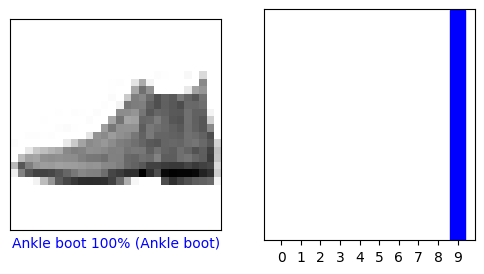

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

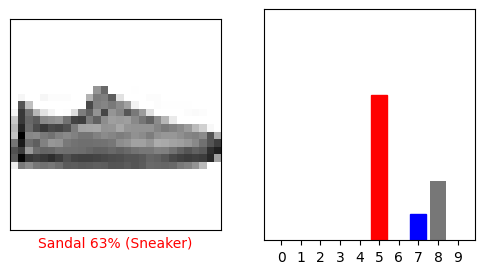

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

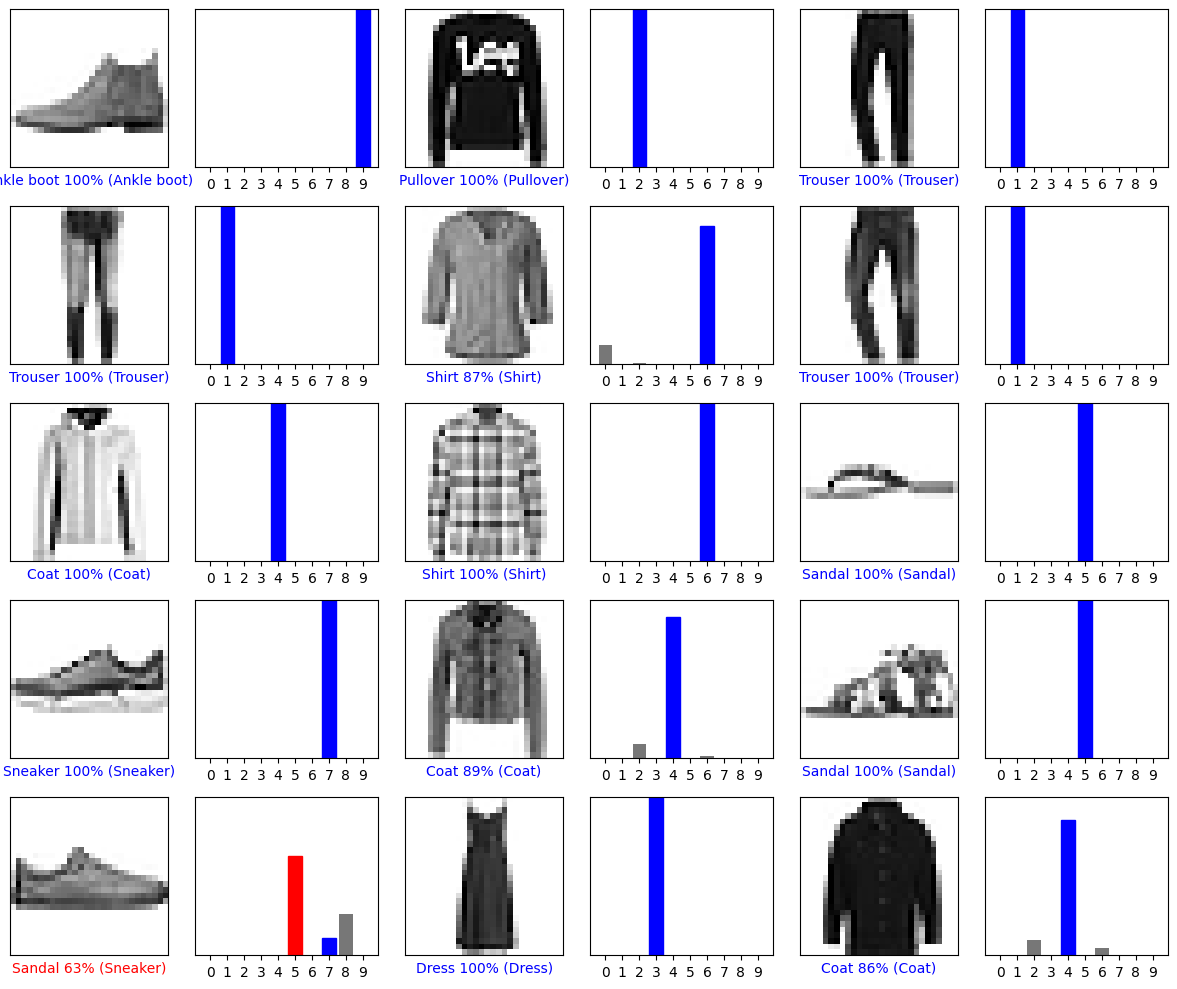

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


[[2.0469446e-04 1.2814922e-12 9.9702674e-01 1.1377493e-09 2.2470655e-03
  1.3456494e-11 5.2149664e-04 6.0750881e-16 3.4679428e-09 2.8104687e-12]]


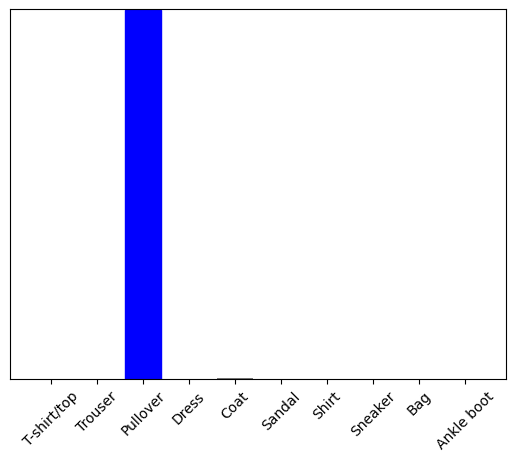

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

To learn more about building models with Keras, see the [Keras guides](https://www.tensorflow.org/guide/keras).